# A first look at the GAIA/TGAS catalog of stars closer than 125 pc

I chose parallaxes less than 8 milli-arcseconds in order to have 99,999 source. With this, I have 66,806 sources.

Importing some modules (libraries) and giving them short names such as **np** and **plt**. You will find that most users will use these common ones.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

## Now lets use astropy table reader... because it is easier..

A file with the extension .vot is an virtual observatory table type. astropy knows this format: votable. Lets read the file into a structure "t". Nice work astropy people!

In [1]:
from astropy.table import Table
t = Table.read('tgas-125max.vot', format='votable')

print(t)



  _RAJ2000    _DEJ2000   HIP   ...     e__FG_    __Gmag_      Var     
    deg         deg            ...      e-/s       mag                
----------- ----------- ------ ... ------------- ------- -------------
 45.1415983   0.3599212     -- ...    1381.57763   9.972 NOT_AVAILABLE
 45.5013423   0.4978025  14113 ...   10509.31628   9.317 NOT_AVAILABLE
 44.9377524   0.6245080  13957 ...    7549.18254   9.483 NOT_AVAILABLE
 44.4144525   0.5676040     -- ...    1424.46465   9.855 NOT_AVAILABLE
 45.1055760   0.8126900     -- ...     332.88929  10.788 NOT_AVAILABLE
 45.4558886   1.7518426     -- ...    1009.45814  10.745 NOT_AVAILABLE
 45.9274472   1.8308535     -- ...     314.71962  10.859 NOT_AVAILABLE
 46.6114044   1.9651751  14445 ...    6447.62725   8.349 NOT_AVAILABLE
 46.7555304   2.1343049     -- ...    2437.98332   9.671 NOT_AVAILABLE
 47.2305296   2.7394977     -- ...    4639.46329   9.602 NOT_AVAILABLE
        ...         ...    ... ...           ...     ...           ...
314.14

## Access to values within the table...

Astropy reads both the header information and the ascii column information. The data in the columns of the table go into the structure with labels corresponding to the column header title... for example

In [15]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)

The astropy reader loads the data into the following variable names:
['_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var']


## so you can access, for example, the parallax, or phot_g_mean_mag

In [16]:
print(t["Source","Plx","__Gmag_"])

       Source        Plx   __Gmag_
                     mas     mag  
------------------- ------ -------
     16527034310784   8.66   9.972
     44358422235136   9.96   9.317
     83150566993664  15.73   9.483
     92599494964480  11.25   9.855
    115723598973952  10.55  10.788
    470797135247616   8.96  10.745
    655102772186240   9.49  10.859
    677436601666432  67.89   8.349
    774468502825984  12.13   9.671
    825801951954176   9.80   9.602
                ...    ...     ...
6916681579054279424   8.38   8.428
6916755074535818752  11.30   8.831
6916867465239970944  12.56   9.237
6916948176264955392  11.62   6.474
6917116126666762880  20.50   6.777
6917213089847483776   9.92  10.189
6917333933046642944   8.60  10.000
6917383239271187712   8.09   9.524
6917452439784507648  23.50  10.029
6917476319802433536  13.72   9.839
Length = 66806 rows


## Make some interesting plots

histograms of magnitudes, parallaxes, and distances

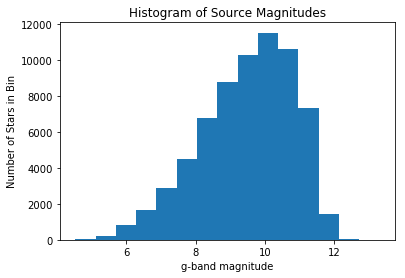

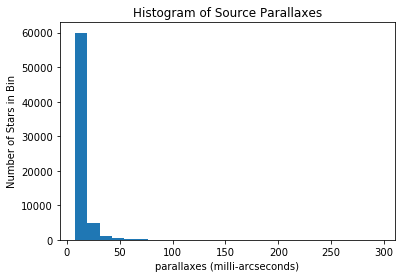

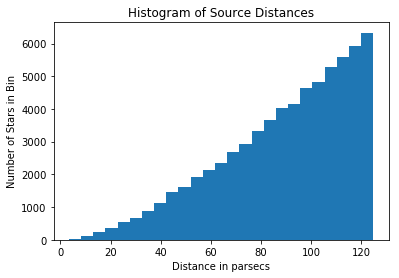

In [21]:
mags = t["__Gmag_"]

bins = 15
plt.xlabel('g-band magnitude')
plt.ylabel('Number of Stars in Bin')
plt.title('Histogram of Source Magnitudes')
plmags=plt.hist(mags,bins)
plt.show()

para = t['Plx']
bins = 25
plt.xlabel('parallaxes (milli-arcseconds)')
plt.ylabel('Number of Stars in Bin')
plt.title('Histogram of Source Parallaxes')
plmags=plt.hist(para,bins)
plt.show()

dist = 1000/para
bins = 25
plt.xlabel('Distance in parsecs')
plt.ylabel('Number of Stars in Bin')
plt.title('Histogram of Source Distances')
plmags=plt.hist(dist,bins)
plt.show()

## Now lets try some plots to look at the data in different ways.
Distance versus magnitude... do you know what you should see?

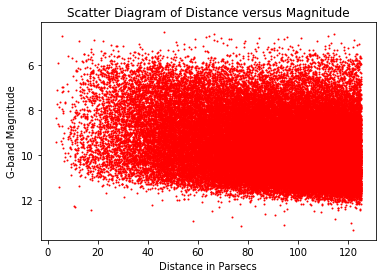

In [27]:
plt.xlabel('Distance in Parsecs')
plt.ylabel('G-band Magnitude')
plt.title('Scatter Diagram of Distance versus Magnitude')
plt.scatter(dist,mags,s=1.0,c='r')
plt.gca().invert_yaxis()
plt.show()

Plot of Distance versus error in distance....

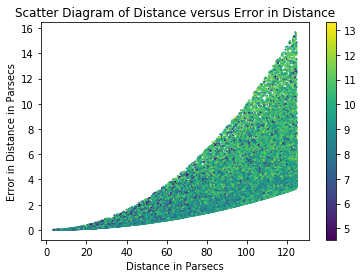

In [32]:
errpara = t['e_Plx']
dist1 = 1000/(para + errpara)
dist2 = 1000/(para - errpara)
errdist = (dist2-dist1)/2
plt.xlabel('Distance in Parsecs')
plt.ylabel('Error in Distance in Parsecs')
plt.title('Scatter Diagram of Distance versus Error in Distance')
plt.scatter(dist,errdist,s=1.0,c=mags)
plt.colorbar()
plt.show()

Number of sources in magnitude interval:  3207
Number of valid sources in x:  3207


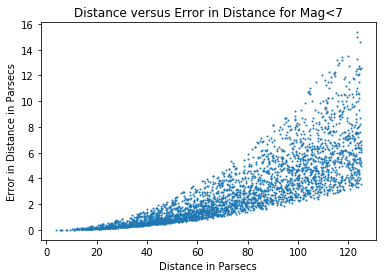

In [49]:
import numpy.ma as ma
magmask = ma.masked_outside(mags,0.,7.)
print('Number of sources in magnitude interval: ',magmask.count())
x = ma.masked_array(dist,mask=magmask.mask)
y = ma.masked_array(errdist,mask=magmask.mask)
print('Number of valid sources in x: ',x.count())
plt.xlabel('Distance in Parsecs')
plt.ylabel('Error in Distance in Parsecs')
plt.title('Distance versus Error in Distance for Mag<7')
plt.scatter(x,y,s=1.0)
plt.show()

Number of sources in magnitude interval:  8211
Number of valid sources in x:  8211


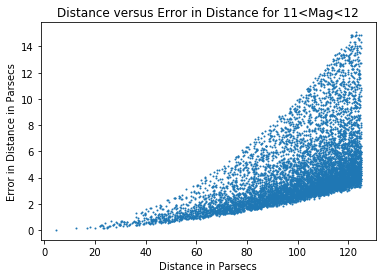

In [50]:
m_min = 11
m_max = 12
magmask = ma.masked_outside(mags,m_min,m_max)
print('Number of sources in magnitude interval: ',magmask.count())
x = ma.masked_array(dist,mask=magmask.mask)
y = ma.masked_array(errdist,mask=magmask.mask)
print('Number of valid sources in x: ',x.count())
plt.xlabel('Distance in Parsecs')
plt.ylabel('Error in Distance in Parsecs')
plt.title('Distance versus Error in Distance for %g<Mag<%g'% (m_min,m_max))
plt.scatter(x,y,s=1.0)
plt.show()